<div style="font-size: 17px">

## Tail Distributions from Wealth Data

Finds the tail distribution from wealth data.

Data is of the form cumulative proportion of people $c_p$ and cumulative proportion of wealth $c_w$. A plot of $c_p$ against $c_w$ is the Lorenz curve.

Taking local gradients of the Lorenz curve $$ \frac{\delta c_w}{\delta c_p} $$ gives the proportion of wealth for proportions of the population. 

If $T_w$ and $T_p$ is the total amount of wealth and people respectively then multiplying by the ratio gives an average amount of wealth per person

$$ \frac{\delta c_w T_w}{\delta c_p T_p} $$

Plotting this on the x-axis vs the $1-c_p$ on the y-axis was the method to find the tail distribution.
However as these average amounts of wealth need to be sorted this may be a problem..

**Issues with data!**

In [1]:
from packages import *
from functions import *
import matplotlib.ticker as mticker
%matplotlib inline

https://www.ons.gov.uk/peoplepopulationandcommunity/personalandhouseholdfinances/incomeandwealth/datasets/totalwealthwealthingreatbritain

In [2]:
direc="./data/"

In [3]:
wealthGB=direc+'totalwealthtablesGB.xlsx'

In [4]:
%%time
break_down_total_wealth = pd.read_excel(wealthGB, sheet_name='2.1')
total_wealth_dist=pd.read_excel(wealthGB, sheet_name='2.7')

CPU times: user 32.3 s, sys: 84 ms, total: 32.3 s
Wall time: 32.4 s


In [5]:
break_down_total_wealth

,Unnamed: 0,Table 2.1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,NaN,"Breakdown of aggregate total wealth, by compon...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Back to Contents
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,July 2014 to June 2016,NaN,NaN,July 2012 to June 2014,NaN,NaN,July 2010 to June 2012,NaN,NaN,July 2008 to June 2010,NaN,NaN,July 2006 to June 20081,NaN,NaN
3,NaN,NaN,NaN,£ Billion,Unweighted Frequency,Weighted Frequency,£ Billion,Unweighted Frequency,Weighted Frequency,£ Billion,Unweighted Frequency,Weighted Frequency,£ Billion,Unweighted Frequency,Weighted Frequency,£ Billion,Unweighted Frequency,Weighted Frequency
4,NaN,Property Wealth (net),NaN,4570,14085,17518000,3908,15106,17433000,3528,15885,16905000,3379,15146,17334000,3537,22166,17188000
5,NaN,Financial Wealth (net),NaN,1636,18814,25916000,1607,20246,25615000,1305,21450,24228000,1091,20170,24725000,1043,30595,24584000
6,NaN,Physical Wealth1,NaN,1248,18814,25916000,1153,20246,25615000,1081,21450,24228000,1016,20170,24725000,961,17316,24584000
7,NaN,Private Pension Wealth,NaN,5324,15499,20468000,4446,16202,19410000,3530,16837,18390000,3470,15901,18596000,2886,22784,17893000
8,NaN,Total Wealth (including Private Pension Wealth),NaN,12778,18814,25916000,11114,20246,25615000,9444,21450,24228000,8955,20170,24725000,8426,30595,24584000
9,NaN,Total Wealth (excluding Private Pension Wealth),NaN,7454,18814,25916000,6668,20246,25615000,5914,21450,24228000,5485,20170,24725000,5540,30595,24584000


In [6]:
data_break_down_total_wealth=break_down_total_wealth.values

x1=[3,6,9,12,15]


total_wealth_totals=[]

total_hh_total_wealth_totals=[]


for i in x1:
    total_wealth_totals.append(data_break_down_total_wealth[8,:][i])
    total_hh_total_wealth_totals.append(data_break_down_total_wealth[8,:][i+2])

In [7]:
print(total_wealth_totals)
print(total_hh_total_wealth_totals)

[12778, 11114, 9444, 8955, 8426]
[25916000, 25615000, 24228000, 24725000, 24584000]


In [8]:
data_total_wealth_dist=total_wealth_dist.values

In [9]:
cumulative_pc_wealth_total_2014_16=data_total_wealth_dist[:,2][865:18137]/100
cumulative_pc_wealth_total_2012_14=data_total_wealth_dist[:,5][927:19365]/100
cumulative_pc_wealth_total_2010_12=data_total_wealth_dist[:,8][1102:20458]/100
cumulative_pc_wealth_total_2008_10=data_total_wealth_dist[:,11][878:19407]/100
cumulative_pc_wealth_total_2006_8=data_total_wealth_dist[:,14][1191:16323]/100

cumulative_pc_hh_total_2014_16=data_total_wealth_dist[:,3][865:18137]/100
cumulative_pc_hh_total_2012_14=data_total_wealth_dist[:,6][927:19365]/100
cumulative_pc_hh_total_2010_12=data_total_wealth_dist[:,9][1102:20458]/100
cumulative_pc_hh_total_2008_10=data_total_wealth_dist[:,12][878:19407]/100
cumulative_pc_hh_total_2006_8=data_total_wealth_dist[:,15][1191:16323]/100

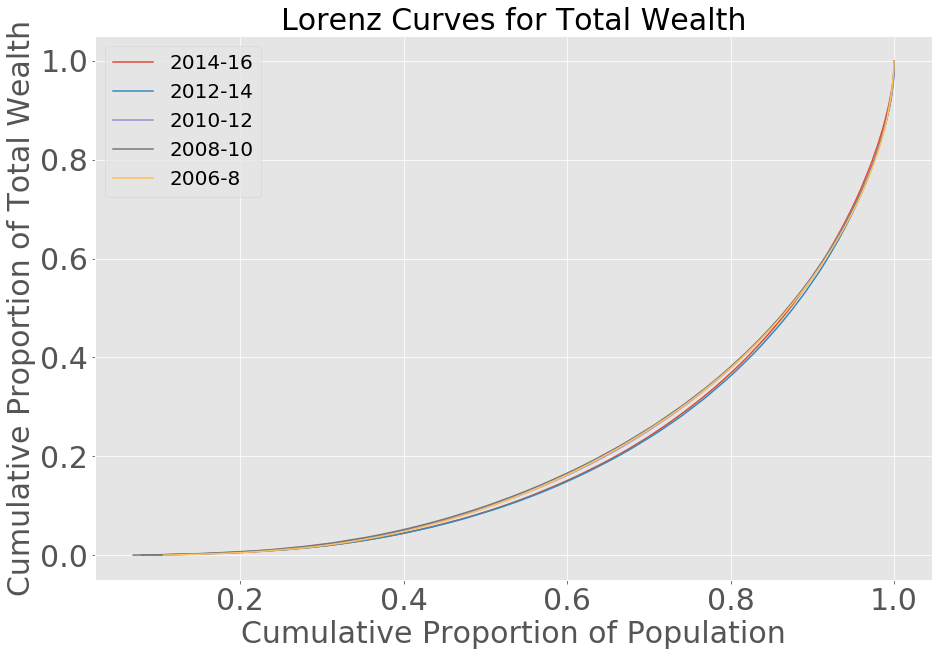

In [10]:
plt.figure(figsize=(15,10))
plt.plot(cumulative_pc_hh_total_2014_16,cumulative_pc_wealth_total_2014_16,label='2014-16')
plt.plot(cumulative_pc_hh_total_2012_14,cumulative_pc_wealth_total_2012_14,label='2012-14')
plt.plot(cumulative_pc_hh_total_2010_12,cumulative_pc_wealth_total_2010_12,label='2010-12')
plt.plot(cumulative_pc_hh_total_2008_10,cumulative_pc_wealth_total_2008_10,label='2008-10')
plt.plot(cumulative_pc_hh_total_2006_8,cumulative_pc_wealth_total_2006_8,label='2006-8')

plt.title('Lorenz Curves for Total Wealth',fontsize=30)
plt.xlabel('Cumulative Proportion of Population',fontsize=30)
plt.ylabel('Cumulative Proportion of Total Wealth',fontsize=30)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.legend(fontsize=20)

In [11]:
cumulative_pc_dif_wealth_total_2014_16=time_dif1(cumulative_pc_wealth_total_2014_16)
cumulative_pc_dif_wealth_total_2012_14=time_dif1(cumulative_pc_wealth_total_2012_14)
cumulative_pc_dif_wealth_total_2010_12=time_dif1(cumulative_pc_wealth_total_2010_12)
cumulative_pc_dif_wealth_total_2008_10=time_dif1(cumulative_pc_wealth_total_2008_10)
cumulative_pc_dif_wealth_total_2006_8=time_dif1(cumulative_pc_wealth_total_2006_8)

cumulative_pc_dif_hh_total_2014_16=time_dif1(cumulative_pc_hh_total_2014_16)
cumulative_pc_dif_hh_total_2012_14=time_dif1(cumulative_pc_hh_total_2012_14)
cumulative_pc_dif_hh_total_2010_12=time_dif1(cumulative_pc_hh_total_2010_12)
cumulative_pc_dif_hh_total_2008_10=time_dif1(cumulative_pc_hh_total_2008_10)
cumulative_pc_dif_hh_total_2006_8=time_dif1(cumulative_pc_hh_total_2006_8)

In [12]:
def find_non_inf_indices(x):
    d=[]
    for i in range(len(x)):
        if(x[i]!=np.inf):
            d.append(i)
    return d

def find_non_zero_and_nan_indices(x):
    d=[]
    for i in range(len(x)):
        if(x[i]!=0 and np.isnan(x[i])==False):
            d.append(i)
    return d

In [13]:

ratio_wealth_hh_total_2014_16= \
cumulative_pc_dif_wealth_total_2014_16/cumulative_pc_dif_hh_total_2014_16

ratio_wealth_hh_total_no_infs_2014_16= \
ratio_wealth_hh_total_2014_16[find_non_inf_indices(ratio_wealth_hh_total_2014_16)] \
*(total_wealth_totals[0]*10**9)/(total_hh_total_wealth_totals[0])

cumulative_pc_hh_total1_2014_16= \
cumulative_pc_hh_total_2014_16[find_non_inf_indices(ratio_wealth_hh_total_2014_16)]
###################################################################################################

ratio_wealth_hh_total_2012_14= \
cumulative_pc_dif_wealth_total_2012_14/cumulative_pc_dif_hh_total_2012_14

ratio_wealth_hh_total_no_infs_2012_14= \
ratio_wealth_hh_total_2012_14[find_non_inf_indices(ratio_wealth_hh_total_2012_14)] \
*(total_wealth_totals[1]*10**9)/(total_hh_total_wealth_totals[1])

cumulative_pc_hh_total1_2012_14= \
cumulative_pc_hh_total_2012_14[find_non_inf_indices(ratio_wealth_hh_total_2012_14)]
####################################################################################################

ratio_wealth_hh_total_2010_12= \
cumulative_pc_dif_wealth_total_2010_12/cumulative_pc_dif_hh_total_2010_12

ratio_wealth_hh_total_no_infs_2010_12= \
ratio_wealth_hh_total_2010_12[find_non_inf_indices(ratio_wealth_hh_total_2010_12)] \
*(total_wealth_totals[2]*10**9)/(total_hh_total_wealth_totals[2])

cumulative_pc_hh_total1_2010_12= \
cumulative_pc_hh_total_2010_12[find_non_inf_indices(ratio_wealth_hh_total_2010_12)]
####################################################################################################

ratio_wealth_hh_total_2008_10= \
cumulative_pc_dif_wealth_total_2008_10/cumulative_pc_dif_hh_total_2008_10

ratio_wealth_hh_total_no_infs_2008_10= \
ratio_wealth_hh_total_2008_10[find_non_inf_indices(ratio_wealth_hh_total_2008_10)] \
*(total_wealth_totals[3]*10**9)/(total_hh_total_wealth_totals[3])

cumulative_pc_hh_total1_2008_10= \
cumulative_pc_hh_total_2008_10[find_non_inf_indices(ratio_wealth_hh_total_2008_10)]

###################################################################################################

ratio_wealth_hh_total_2006_8= \
cumulative_pc_dif_wealth_total_2006_8/cumulative_pc_dif_hh_total_2006_8

ratio_wealth_hh_total_no_infs_2006_8= \
ratio_wealth_hh_total_2006_8[find_non_inf_indices(ratio_wealth_hh_total_2006_8)] \
*(total_wealth_totals[4]*10**9)/(total_hh_total_wealth_totals[4])

cumulative_pc_hh_total1_2006_8= \
cumulative_pc_hh_total_2006_8[find_non_inf_indices(ratio_wealth_hh_total_2006_8)]



/home/samuel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/samuel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/samuel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/home/samuel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/home/samuel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/home/samuel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/home/samuel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: 

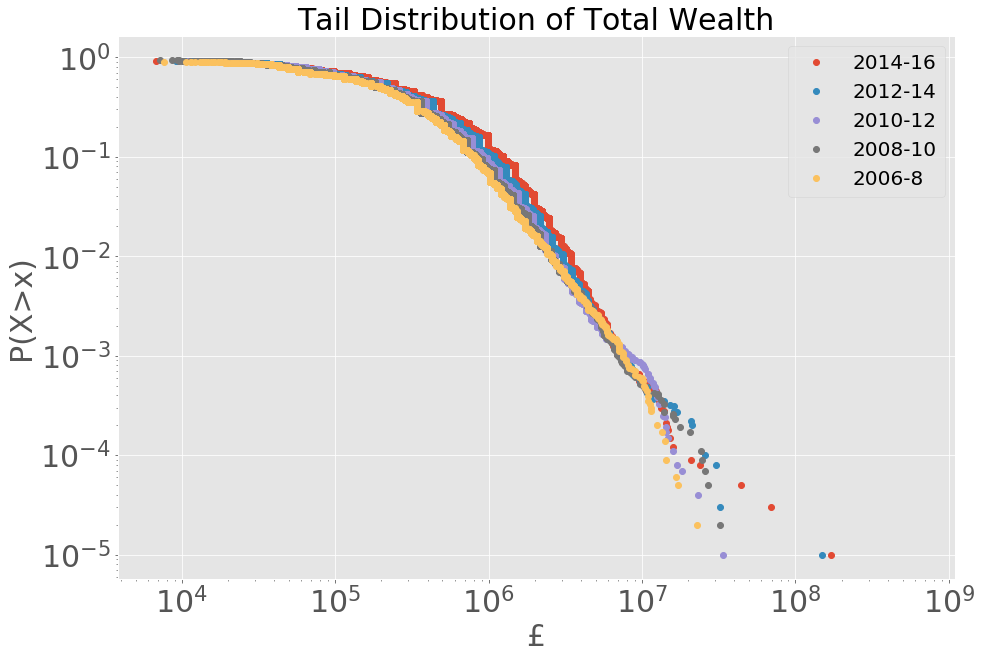

In [14]:
x_tot_2014_16=ratio_wealth_hh_total_no_infs_2014_16
y_tot_2014_16=1-cumulative_pc_hh_total1_2014_16

x_tot_2012_14=ratio_wealth_hh_total_no_infs_2012_14
y_tot_2012_14=1-cumulative_pc_hh_total1_2012_14

x_tot_2010_12=ratio_wealth_hh_total_no_infs_2010_12
y_tot_2010_12=1-cumulative_pc_hh_total1_2010_12

x_tot_2008_10=ratio_wealth_hh_total_no_infs_2008_10
y_tot_2008_10=1-cumulative_pc_hh_total1_2008_10

x_tot_2006_8=ratio_wealth_hh_total_no_infs_2006_8
y_tot_2006_8=1-cumulative_pc_hh_total1_2006_8

i1=find_non_zero_and_nan_indices(x_tot_2014_16)
i2=find_non_zero_and_nan_indices(x_tot_2012_14)
i3=find_non_zero_and_nan_indices(x_tot_2010_12)
i4=find_non_zero_and_nan_indices(x_tot_2008_10)
i5=find_non_zero_and_nan_indices(x_tot_2006_8)

x_tot_2014_16=x_tot_2014_16[i1]
y_tot_2014_16=y_tot_2014_16[i1]

x_tot_2012_14=x_tot_2012_14[i2]
y_tot_2012_14=y_tot_2012_14[i2]

x_tot_2010_12=x_tot_2010_12[i3]
y_tot_2010_12=y_tot_2010_12[i3]

x_tot_2008_10=x_tot_2008_10[i4]
y_tot_2008_10=y_tot_2008_10[i4]

x_tot_2006_8=x_tot_2006_8[i5]
y_tot_2006_8=y_tot_2006_8[i5]

plt.figure(figsize=(15,10))

plt.loglog(np.sort(x_tot_2014_16[1:]),y_tot_2014_16[1:],'o',label='2014-16')
plt.loglog(np.sort(x_tot_2012_14)[1:],y_tot_2012_14[1:],'o',label='2012-14')
plt.loglog(np.sort(x_tot_2010_12)[1:],y_tot_2010_12[1:],'o',label='2010-12')
plt.loglog(np.sort(x_tot_2008_10)[1:],y_tot_2008_10[1:],'o',label='2008-10')
plt.loglog(np.sort(x_tot_2006_8)[1:],y_tot_2006_8[1:],'o',label='2006-8')

plt.title('Tail Distribution of Total Wealth',fontsize=30)
plt.xlabel('£',fontsize=30)
plt.ylabel('P(X>x)',fontsize=30)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.legend(fontsize=20)